In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("TravelInsurancePrediction.csv")

In [3]:
df.shape

(1987, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           1987 non-null   int64 
 1   Age                  1987 non-null   int64 
 2   Employment Type      1987 non-null   object
 3   GraduateOrNot        1987 non-null   object
 4   AnnualIncome         1987 non-null   int64 
 5   FamilyMembers        1987 non-null   int64 
 6   ChronicDiseases      1987 non-null   int64 
 7   FrequentFlyer        1987 non-null   object
 8   EverTravelledAbroad  1987 non-null   object
 9   TravelInsurance      1987 non-null   int64 
dtypes: int64(6), object(4)
memory usage: 155.4+ KB


In [5]:
df.isnull().sum()

Unnamed: 0             0
Age                    0
Employment Type        0
GraduateOrNot          0
AnnualIncome           0
FamilyMembers          0
ChronicDiseases        0
FrequentFlyer          0
EverTravelledAbroad    0
TravelInsurance        0
dtype: int64

In [6]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [7]:
df['Employment Type']=df['Employment Type'].map({'Government Sector':0, 'Private Sector/Self Employed':1})
df['GraduateOrNot']=df['GraduateOrNot'].map({'No':0, 'Yes':1})
df['FrequentFlyer']=df['FrequentFlyer'].map({'No':0, 'Yes':1})
df['EverTravelledAbroad']=df['EverTravelledAbroad'].map({'No':0, 'Yes':1})

In [8]:
df[['Age','AnnualIncome','FamilyMembers']].describe()

,Age,AnnualIncome,FamilyMembers
count,1987.000000,1.987000e+03,1987.000000
mean,29.650226,9.327630e+05,4.752894
std,2.913308,3.768557e+05,1.609650
min,25.000000,3.000000e+05,2.000000
25%,28.000000,6.000000e+05,4.000000
50%,29.000000,9.000000e+05,5.000000
75%,32.000000,1.250000e+06,6.000000
max,35.000000,1.800000e+06,9.000000


In [9]:
df.head()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,0,1,400000,6,1,0,0,0
1,31,1,1,1250000,7,0,0,0,0
2,34,1,1,500000,4,1,0,0,1
3,28,1,1,700000,3,1,0,0,0
4,28,1,1,700000,8,1,1,0,0


In [10]:
# creating numpy array of Age values
x = df['Age'].values
# New categories
cat = [0,1]
df['AgeCategory']=np.select([x<=30, x>30],cat)

In [11]:
x = df['AnnualIncome'].values
cat = [0,1]
df['IncomeCategory']=np.select([x<=1000000, x>1000000],cat)

In [12]:
x = df['FamilyMembers'].values
cat = [0,1]
df['FMembersCategory']=np.select([x<=5, x>5],cat)

In [13]:
df = df.drop(["AnnualIncome","Age","FamilyMembers"], axis=1)

In [14]:
df.head()

,Employment Type,GraduateOrNot,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance,AgeCategory,IncomeCategory,FMembersCategory
0,0,1,1,0,0,0,1,0,1
1,1,1,0,0,0,0,1,1,1
2,1,1,1,0,0,1,1,0,0
3,1,1,1,0,0,0,0,0,0
4,1,1,1,1,0,0,0,0,1


In [15]:
X=df.drop('TravelInsurance',axis=1)

In [16]:
y=df['TravelInsurance']

In [17]:
y.head()

0    0
1    0
2    1
3    0
4    0
Name: TravelInsurance, dtype: int64

In [18]:
X.head()

,Employment Type,GraduateOrNot,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,AgeCategory,IncomeCategory,FMembersCategory
0,0,1,1,0,0,1,0,1
1,1,1,0,0,0,1,1,1
2,1,1,1,0,0,1,0,0
3,1,1,1,0,0,0,0,0
4,1,1,1,1,0,0,0,1


In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8,random_state=42,shuffle=True)

In [20]:
print(X_train.shape)
print(X_test.shape)

(1589, 8)
(398, 8)


In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

parameters = {'n_neighbors':np.arange(1,51)}
knn = KNeighborsClassifier()
gs_knn=GridSearchCV(knn,param_grid=parameters,cv=10)
gs_knn.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])})

In [22]:
print('GridSearch CV best score:{:.4f}'.format(gs_knn.best_score_))
print('Best Result Parameters',(gs_knn.best_params_))
print('Estimator choosen by search :',(gs_knn.best_estimator_))

GridSearch CV best score:0.7942
Best Result Parameters {'n_neighbors': 9}
Estimator choosen by search : KNeighborsClassifier(n_neighbors=9)


In [23]:
print('Training score:{:.4f}'.format(gs_knn.score(X_train,y_train)))
print('Test score: {:.4f}'.format(gs_knn.score(X_test,y_test)))

Training score:0.8024
Test score: 0.7915


In [24]:
from sklearn.metrics import classification_report

y_pred= gs_knn.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.93      0.85       257
           1       0.81      0.54      0.65       141

    accuracy                           0.79       398
   macro avg       0.80      0.73      0.75       398
weighted avg       0.79      0.79      0.78       398



Text(0.5, 15.0, 'Predicted Label')

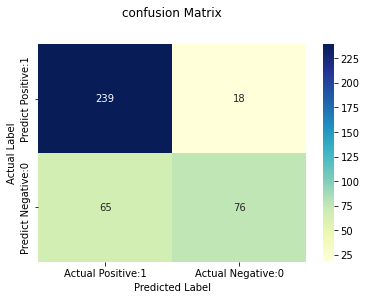

In [27]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics

y_pred= gs_knn.predict(X_test)
cnf_matrix=metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix,columns=['Actual Positive:1','Actual Negative:0'],
                             index=['Predict Positive:1','Predict Negative:0']),
                annot=True, cmap='YlGnBu',fmt='g' )
plt.title('confusion Matrix', y=1.1)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')